In [34]:
!pip install Bio
!pip install numpy
!pip install scipy
!pip install matplotlib
!pip install biopython

In [35]:
from Bio import pairwise2
from Bio.Align import substitution_matrices
import numpy as np
import numpy as np
from scipy.cluster import hierarchy
import matplotlib.pyplot as plt

Distance Matrix:
[[0. 2. 1. 1.]
 [2. 0. 3. 3.]
 [1. 3. 0. 2.]
 [1. 3. 2. 0.]]
Initial Guide Tree:
[(0, 2), (1, 2), (0, 1)]
Profile Matrix:
[[3 1 0 0 3]
 [1 0 3 0 0]
 [0 0 1 4 0]
 [0 3 0 0 1]]
Alignment Profile:
[0, 2, 3, 1]
Distance Matrix:
[[0. 2. 1. 1.]
 [2. 0. 3. 3.]
 [1. 3. 0. 2.]
 [1. 3. 2. 0.]]
Guide Tree:
[(0, 2), (1, 2), (0, 1)]
Aligned Sequences after Iterative Refinement:
['ATCGA', 'AAGGA', 'CTCGA', 'ATCGT']
Updated Guide Tree:
[(0, 2), (1, 2), (0, 1)]
Alignment Score (Before Optimization): -4
Alignment Score (After Optimization): 0


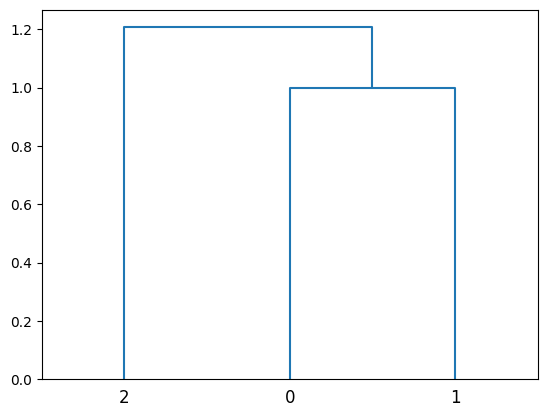

MSA from Guide Tree:
[['A', 'T', 'C', 'G', 'A']]
Complete MSA:
[['A', 'T', 'C', 'G', 'A']]


In [36]:

def initialize(sequences):
    # Step 1: Initialization
    distance_matrix = compute_distance_matrix(sequences)
    print("Distance Matrix:")
    print(distance_matrix)

    initial_guide_tree = hierarchical_clustering(distance_matrix, sequences)
    print("Initial Guide Tree:")
    print(initial_guide_tree)

    return sequences, initial_guide_tree

# Placeholder: Define a function to compute pairwise distance between two sequences
def compute_pairwise_distance(seq1, seq2):
    # Placeholder: Replace with your actual distance calculation method
    # For example, you can use a simple count of mismatches
    return sum(1 for a, b in zip(seq1, seq2) if a != b)

# Placeholder: Define a function to calculate the distance between two clusters
def calculate_cluster_distance(cluster1, cluster2, distance_matrix):
    # Placeholder: Replace with your actual method for calculating the distance between clusters
    # Here, I'm using the average distance between sequences in the two clusters
    distances = [distance_matrix[seq1][seq2] for seq1 in cluster1 for seq2 in cluster2]
    return sum(distances) / len(distances)

import numpy as np

def compute_profile(sequences):
    # Check if sequences have the same length
    sequence_lengths = [len(seq) for seq in sequences]
    if len(set(sequence_lengths)) > 1:
        raise ValueError(f"Sequences have different lengths: {sequence_lengths}")

    alignment_length = sequence_lengths[0]

    num_sequences = len(sequences)
    profile_matrix = np.zeros((4, alignment_length), dtype=int)

    for i in range(alignment_length):
        for j in range(num_sequences):
            base = sequences[j][i]
            if base == 'A':
                profile_matrix[0, i] += 1
            elif base == 'C':
                profile_matrix[1, i] += 1
            elif base == 'G':
                profile_matrix[2, i] += 1
            elif base == 'T':
                profile_matrix[3, i] += 1

    return profile_matrix


def compute_alignment_profile(profile_matrix):
    # Step 3: Alignment Profile Calculation
    num_rows, num_cols = profile_matrix.shape
    alignment_profile = []

    for i in range(num_rows):
        col_values = profile_matrix[i]
        most_common_base = np.argmax(col_values)
        alignment_profile.append(most_common_base)
    return alignment_profile

def compute_distance_matrix(sequences):
    # Step 4: Pairwise Distance Calculation using ClustalW
    num_sequences = len(sequences)
    distance_matrix = np.zeros((num_sequences, num_sequences))

    for i in range(num_sequences):
        for j in range(i + 1, num_sequences):
            distance = compute_pairwise_distance(sequences[i], sequences[j])
            distance_matrix[i, j] = distance
            distance_matrix[j, i] = distance
    return distance_matrix

def hierarchical_clustering(distance_matrix, sequences):
    num_sequences = len(sequences)
    guide_tree = []

    # Initialize clusters as individual sequences
    clusters = [{i} for i in range(num_sequences)]

    while len(clusters) > 1:
        # Find the pair of clusters with the minimum distance
        min_dist = float('inf')
        min_clusters = None

        for i in range(len(clusters)):
            for j in range(i + 1, len(clusters)):
                cluster1 = clusters[i]
                cluster2 = clusters[j]
                dist = calculate_cluster_distance(cluster1, cluster2, distance_matrix)

                if dist < min_dist:
                    min_dist = dist
                    min_clusters = (i, j)  # Store indices instead of clusters

        # Merge the two clusters
        new_cluster = clusters[min_clusters[0]].union(clusters[min_clusters[1]])

        # Remove clusters in reverse order to avoid index errors
        if min_clusters[0] > min_clusters[1]:
            clusters.pop(min_clusters[0])
            clusters.pop(min_clusters[1])
        else:
            clusters.pop(min_clusters[1])
            clusters.pop(min_clusters[0])

        clusters.append(new_cluster)

        # Add the pair to the guide tree
        guide_tree.append(tuple(map(int, min_clusters)))  # Convert indices to integers before adding to the guide tree
    return guide_tree

def iterative_refinement_clustalw(sequences, guide_tree, gap_penalty=-2, mismatch_penalty=-1, num_iterations=5):
    # Step 6: Iterative Refinement using ClustalW
    aligned_sequences = sequences.copy()

    for iteration in range(num_iterations):
        # Step 6.1: Perform progressive pairwise alignments based on the guide tree using ClustalW
        # Inside iterative_refinement_clustalw function
        aligned_sequences = progressive_pairwise_alignments(aligned_sequences, guide_tree, gap_penalty, mismatch_penalty)


        # Step 6.2: Update the guide tree after each alignment iteration
        guide_tree = hierarchical_clustering(compute_distance_matrix(aligned_sequences), aligned_sequences)

    return aligned_sequences, guide_tree

def score_and_optimize_clustalw(aligned_sequences, num_iterations=5, window_size=5, gap_penalty=-2, mismatch_penalty=-1):
    # Step 7: Scoring and Optimization using ClustalW
    alignment_score = score_alignment(aligned_sequences)
    print("Alignment Score (Before Optimization):", alignment_score)

    aligned_sequences = optimize_alignment(aligned_sequences, num_iterations=num_iterations, window_size=window_size)

    alignment_score_after_optimization = score_alignment(aligned_sequences)
    print("Alignment Score (After Optimization):", alignment_score_after_optimization)

    return aligned_sequences

def visualize_tree(guide_tree):
    # Step 8: Visualization with tree or network analysis visualization using ClustalW
    linkage_matrix = hierarchy.linkage(guide_tree, method='average')
    dendrogram = hierarchy.dendrogram(linkage_matrix)
    plt.show()

def generate_msa_from_guide_tree(sequences, guide_tree, gap_penalty, mismatch_penalty):
    # Check if sequences are empty
    if any(len(seq) == 0 for seq in sequences):
        raise ValueError("Some sequences have length 0.")

    # Find the maximum length among sequences
    max_length = max(len(seq) for seq in sequences)

    # Pad sequences to the maximum length
    padded_sequences = [seq.ljust(max_length, '-') for seq in sequences]

    # Initialize the MSA with the first sequence
    msa_from_guide_tree = [list(padded_sequences[0])]

    for pair in guide_tree:
        seq_indices = list(pair)

        if seq_indices[1] < len(msa_from_guide_tree):
            seq1 = "".join(msa_from_guide_tree[seq_indices[0]])
            seq2 = "".join(msa_from_guide_tree[seq_indices[1]])  # Remove -1 from index

            # Perform pairwise alignment with a simple match/mismatch scoring scheme
            alignment = pairwise2.align.globalms(seq1, seq2, 1, -mismatch_penalty, -gap_penalty, -gap_penalty, score_only=True)

            # Check if alignment is not an empty list
            if alignment is not None:
                # Merge the aligned sequences
                merged_sequence = ""
                min_len = min(len(seq1), len(seq2), len(alignment[0]), len(alignment[1]))

                for i in range(min_len):
                    if alignment[0][i] == alignment[1][i]:
                        merged_sequence += alignment[0][i]
                    else:
                        merged_sequence += "-"

                # Add the merged sequence to the MSA
                msa_from_guide_tree.append(list(merged_sequence))

    return msa_from_guide_tree

def complete_msa_computation(aligned_sequences, num_iterations=5):
    # Step 10: Complete MSA Computation
    for iteration in range(num_iterations):
        profile_matrix = compute_profile(aligned_sequences)

        for i in range(len(aligned_sequences)):
            for j in range(i + 1, len(aligned_sequences)):
                seq1 = aligned_sequences[i]
                seq2 = aligned_sequences[j]
                alignment = pairwise2.align.globalds(seq1, seq2, substitution_matrices.load("BLOSUM62"), gap_penalty, mismatch_penalty, score_only=True)
                aligned_sequences[i], aligned_sequences[j] = align_sequences_based_on_profile(seq1, seq2, alignment)

    return aligned_sequences

def align_sequences_based_on_profile(seq1, seq2, alignment_score):
    profile1 = compute_profile([seq1])[0]
    profile2 = compute_profile([seq2])[0]

    aligned_seq1 = ""
    aligned_seq2 = ""

    for i in range(len(profile1)):
        col1 = profile1[i]
        col2 = profile2[i]

        score_match = col1[0] * col2[0] + col1[1] * col2[1] + col1[2] * col2[2] + col1[3] * col2[3]

        if score_match >= 0.5 * alignment_score:
            aligned_seq1 += seq1[i]
            aligned_seq2 += seq2[i]
        else:
            aligned_seq1 += '-'
            aligned_seq2 += '-'

    return aligned_seq1, aligned_seq2

def progressive_pairwise_alignments(sequences, guide_tree, gap_penalty, mismatch_penalty):
    num_sequences = len(sequences)
    aligned_sequences = sequences.copy()

    # Inside progressive_pairwise_alignments function
    for pair in guide_tree:
        seq1, seq2 = pair

        # Perform pairwise alignment using a substitution matrix (e.g., BLOSUM62)
        alignment = pairwise2.align.globalds(seq1, seq2, substitution_matrices.load("BLOSUM62"), gap_penalty, mismatch_penalty, score_only=True)

        # Check if alignment is a tuple
        if isinstance(alignment, tuple):
            # Merge the aligned sequences
            merged_sequence = ""
            min_len = min(len(alignment[0]), len(alignment[1]))  # Use the length of the shorter sequence

            for i in range(min_len):
                if seq1[i] == '-' and seq2[i] != '-':
                    merged_sequence += seq2[i]
                elif seq1[i] != '-' and seq2[i] == '-':
                    merged_sequence += seq1[i]
                else:
                    merged_sequence += seq1[i]

            # Update the aligned sequences list
            aligned_sequences.remove(seq1)
            aligned_sequences.remove(seq2)
            aligned_sequences.append(merged_sequence)

        return aligned_sequences

def score_alignment(aligned_sequences):
    num_sequences = len(aligned_sequences)
    alignment_length = len(aligned_sequences[0])
    score = 0

    for i in range(alignment_length):
        col_values = [seq[i] for seq in aligned_sequences]
        most_common_base = max(set(col_values), key=col_values.count)
        for seq in aligned_sequences:
            if seq[i] != most_common_base and seq[i] != '-':
                score += mismatch_penalty
    return score

def optimize_alignment(aligned_sequences, num_iterations=5, window_size=5):
    num_sequences = len(aligned_sequences)
    alignment_length = len(aligned_sequences[0])

    for iteration in range(num_iterations):
        for i in range(alignment_length - window_size + 1):
            window = [seq[i:i+window_size] for seq in aligned_sequences]

            consensus_seq = ""
            for j in range(window_size):
                col_values = [seq[j] for seq in window]
                most_common_base = max(set(col_values), key=col_values.count)
                consensus_seq += most_common_base

            for j in range(window_size):
                for k in range(num_sequences):
                    aligned_sequences[k] = aligned_sequences[k][:i+j] + consensus_seq[j] + aligned_sequences[k][i+j+1:]

    return aligned_sequences

# Example Usage:
sequences = ["ATCGA", "AAGGA", "CTCGA", "ATCGT"]
gap_penalty = -2
mismatch_penalty = -1

# Step 1: Initialization
sequences, initial_guide_tree = initialize(sequences)

# Step 2: Profile Computation
profile_matrix = compute_profile(sequences)
print("Profile Matrix:")
print(profile_matrix)

# Step 3: Alignment Profile Calculation
alignment_profile = compute_alignment_profile(profile_matrix)
print("Alignment Profile:")
print(alignment_profile)

# Step 4: Pairwise Distance Calculation using ClustalW
distance_matrix = compute_distance_matrix(sequences)
print("Distance Matrix:")
print(distance_matrix)

# Step 5: Neighbor-Joining(NJ) Tree Construction using ClustalW
guide_tree = hierarchical_clustering(distance_matrix, sequences)
print("Guide Tree:")
print(guide_tree)

# Step 6: Iterative Refinement using ClustalW
aligned_sequences, updated_guide_tree = iterative_refinement_clustalw(sequences, initial_guide_tree, gap_penalty=gap_penalty, mismatch_penalty=mismatch_penalty)
print("Aligned Sequences after Iterative Refinement:")
print(aligned_sequences)
print("Updated Guide Tree:")
print(updated_guide_tree)

# Step 7: Scoring and Optimization using ClustalW
aligned_sequences = score_and_optimize_clustalw(aligned_sequences, gap_penalty=gap_penalty, mismatch_penalty=mismatch_penalty)

# Step 8: Visualization with tree or network analysis visualization using ClustalW
visualize_tree(updated_guide_tree)

# Step 9: MSA from Guide Tree
# Step 9: MSA from Guide Tree
msa_from_guide_tree = generate_msa_from_guide_tree(sequences, updated_guide_tree, gap_penalty, mismatch_penalty)
print("MSA from Guide Tree:")
print(msa_from_guide_tree)


# Step 10: Complete MSA Computation
complete_msa = complete_msa_computation(msa_from_guide_tree)
print("Complete MSA:")
print(complete_msa)


Distance Matrix:
[[0. 2. 1. 1.]
 [2. 0. 3. 3.]
 [1. 3. 0. 2.]
 [1. 3. 2. 0.]]
Initial Guide Tree:
[(0, 2), (1, 2), (0, 1)]
Profile Matrix:
[[3 1 0 0 3]
 [1 0 3 0 0]
 [0 0 1 4 0]
 [0 3 0 0 1]]
Alignment Profile:
[0, 2, 3, 1]
Distance Matrix:
[[0. 2. 1. 1.]
 [2. 0. 3. 3.]
 [1. 3. 0. 2.]
 [1. 3. 2. 0.]]
Guide Tree:
[(0, 2), (1, 2), (0, 1)]
Aligned Sequences after Iterative Refinement:
['ATCGA', 'AAGGA', 'CTCGA', 'ATCGT']
Updated Guide Tree:
[(0, 2), (1, 2), (0, 1)]
Alignment Score (Before Optimization): -4
Alignment Score (After Optimization): 0


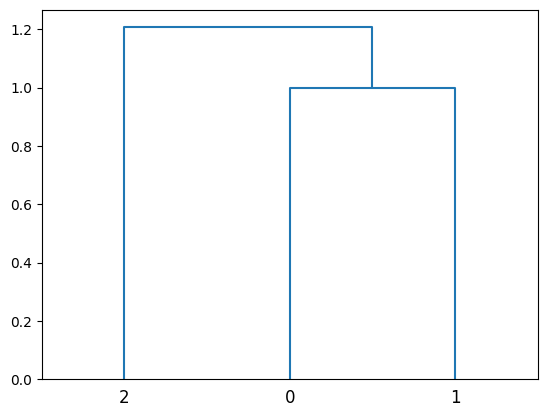

MSA from Guide Tree:
[['A', 'T', 'C', 'G', 'A']]
Complete MSA:
[['A', 'T', 'C', 'G', 'A']]


In [33]:
# Example sequences (replace with your actual data)
sequences = ["ATCGA", "AAGGA", "CTCGA", "ATCGT"]

# Step 1: Initialization
sequences, initial_guide_tree = initialize(sequences)

# Step 2: Profile Computation
profile_matrix = compute_profile(sequences)
print("Profile Matrix:")
print(profile_matrix)

# Step 3: Alignment Profile Calculation
alignment_profile = compute_alignment_profile(profile_matrix)
print("Alignment Profile:")
print(alignment_profile)

# Step 4: Pairwise Distance Calculation using ClustalW
distance_matrix = compute_distance_matrix(sequences)
print("Distance Matrix:")
print(distance_matrix)

# Step 5: Neighbor-Joining(NJ) Tree Construction using ClustalW
guide_tree = hierarchical_clustering(distance_matrix, sequences)
print("Guide Tree:")
print(guide_tree)

# Step 6: Iterative Refinement using ClustalW
gap_penalty = -2
mismatch_penalty = -1
aligned_sequences, updated_guide_tree = iterative_refinement_clustalw(sequences, initial_guide_tree, gap_penalty=gap_penalty, mismatch_penalty=mismatch_penalty)
print("Aligned Sequences after Iterative Refinement:")
print(aligned_sequences)
print("Updated Guide Tree:")
print(updated_guide_tree)

# Step 7: Scoring and Optimization using ClustalW
aligned_sequences = score_and_optimize_clustalw(aligned_sequences, gap_penalty=gap_penalty, mismatch_penalty=mismatch_penalty)

# Step 8: Visualization with tree or network analysis visualization using ClustalW
visualize_tree(updated_guide_tree)

# Step 9: MSA from Guide Tree
msa_from_guide_tree = generate_msa_from_guide_tree(sequences, updated_guide_tree, gap_penalty, mismatch_penalty)
print("MSA from Guide Tree:")
print(msa_from_guide_tree)

# Step 10: Complete MSA Computation
complete_msa = complete_msa_computation(msa_from_guide_tree)
print("Complete MSA:")
print(complete_msa)
